In [1]:
import pandas as pd

In [2]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13

In [24]:
from IPython.display import Image

# Данные

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
prices = pd.read_csv('data/MagnitPrices/Magnit.csv')
prices['MagnitDoubled'] = prices.Magnit * 2 # just for the demo purposes

# Инструменты и фреймворки

## MatPlotLib

In [5]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

ООП-дизайн.

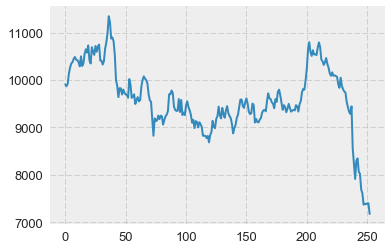

In [6]:
plt.plot(prices.Magnit) # <-- функции возвращают порожденные объекты

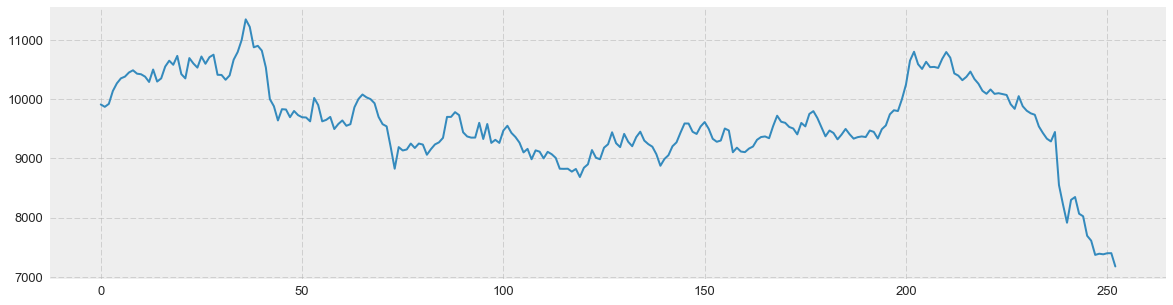

In [7]:
plt.figure(figsize=(20, 5)) # - в дюймах!
plt.plot(prices.Magnit); # написанные в одной ячейке делят оси между собой

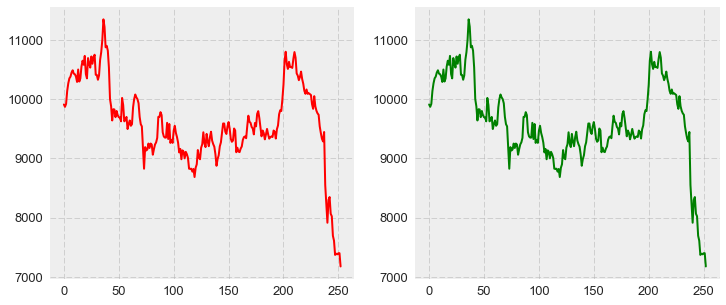

In [8]:
f, axs = plt.subplots(1,2, figsize=(12, 5))
axs[0].plot(prices.Magnit, c='red');
axs[1].plot(prices.Magnit, c='green'); 

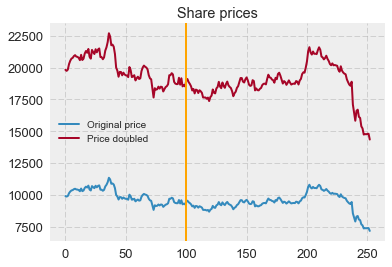

In [9]:
prices_doubled = prices.Magnit * 2
plt.plot(prices.Magnit, label='Original price');
plt.plot(prices_doubled, label='Price doubled');
plt.axvline(x=100, c='orange');
plt.legend();
plt.title('Share prices');

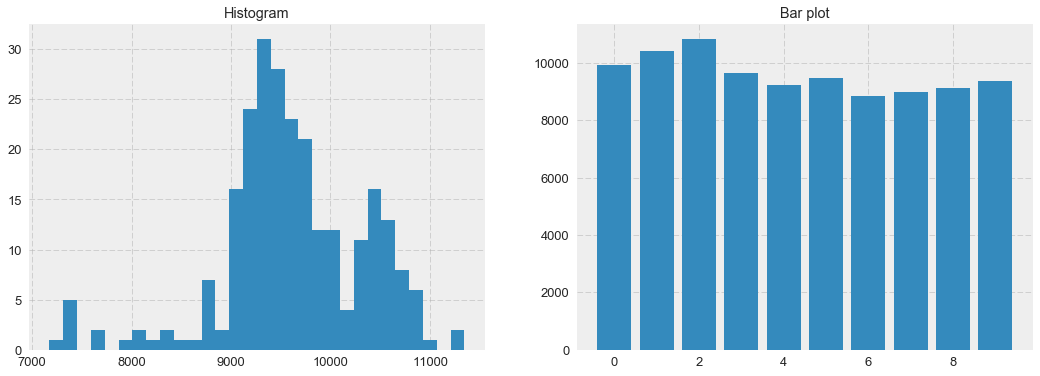

In [10]:
f, axs = plt.subplots(1,2, figsize=(18, 6))
axs[0].hist(prices.Magnit, bins=30);
axs[0].set_title('Histogram');
axs[1].bar(range(len(prices.Magnit[0:200:20])), prices.Magnit[0:200:20]);
axs[1].set_title('Bar plot');

## Pandas

Довески на dataframe.

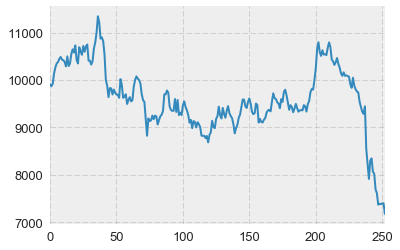

In [11]:
prices.Magnit.plot(); # - по сути вызов функций от dataframe/series-объектов

<div class="panel panel-danger" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Внимание</h3> 
    </div>
</div>

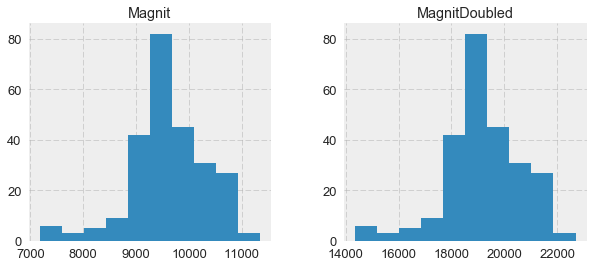

In [12]:
prices.hist(figsize=(10, 4)); # разные колонки в РАЗНЫХ графиках

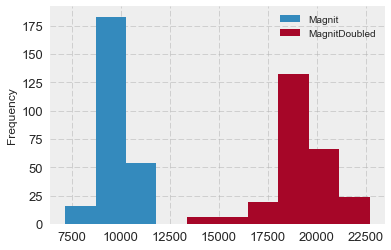

In [13]:
prices.plot.hist(); # разные колонки на ОДНОМ И ТОМ ЖЕ графике

Спасибо за внимание!

---

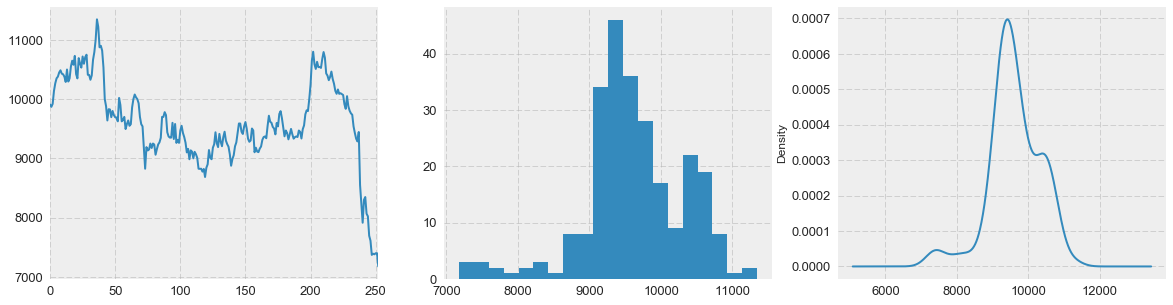

In [14]:
# Более сложное рисование, например, с несколькими графиками, отлично подцепляется к matplotlib
f, axs = plt.subplots(1,3, figsize=(20, 5))
prices.Magnit.plot(ax=axs[0]); 
prices.Magnit.hist(bins=20, ax=axs[1]);
prices.Magnit.plot.kde(ax=axs[2]);

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


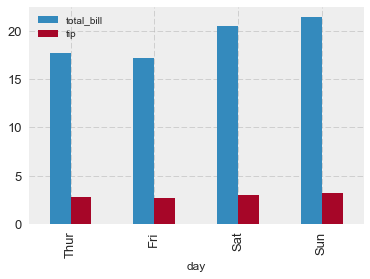

In [16]:
tips.groupby('day').agg('mean')[['total_bill', 'tip']].plot.bar();

## Seaborn

In [17]:
import seaborn as sns
sns.set()

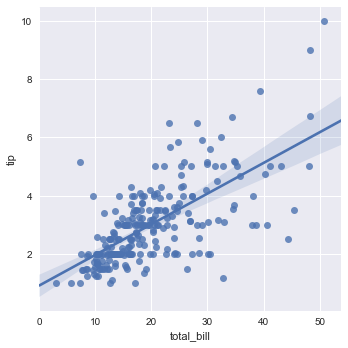

In [18]:
sns.lmplot(x='total_bill', y='tip', data=tips);

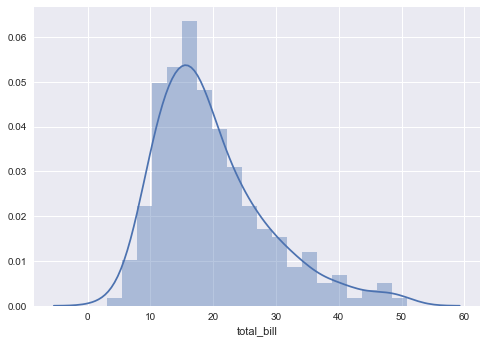

In [19]:
sns.distplot(tips.total_bill, bins=20);

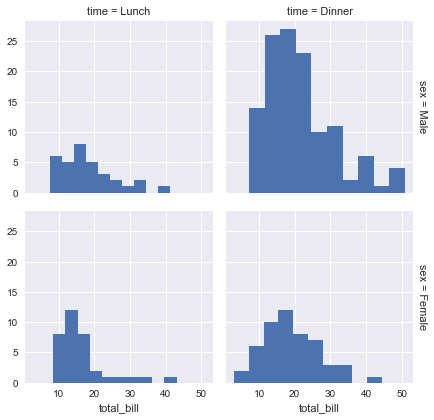

In [20]:
g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(plt.hist, 'total_bill');

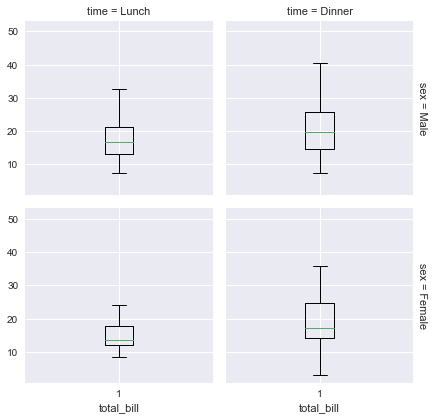

In [21]:
def myFancyBoxplot(x, *args, **kwargs):
    return plt.boxplot(x.ravel()) # not so fancy :(

g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(myFancyBoxplot, 'total_bill');

<div class="panel panel-warning" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Как читать boxplot?</h3> 
    </div>
</div>

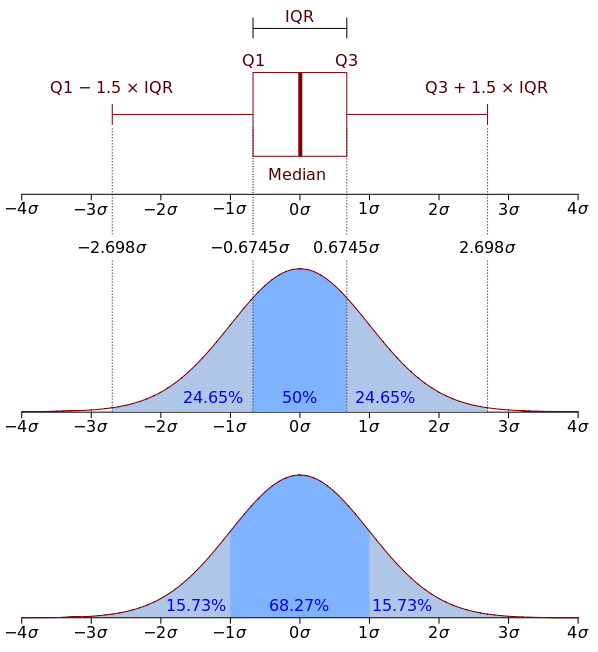

In [25]:
Image('images/boxplot.png')

---

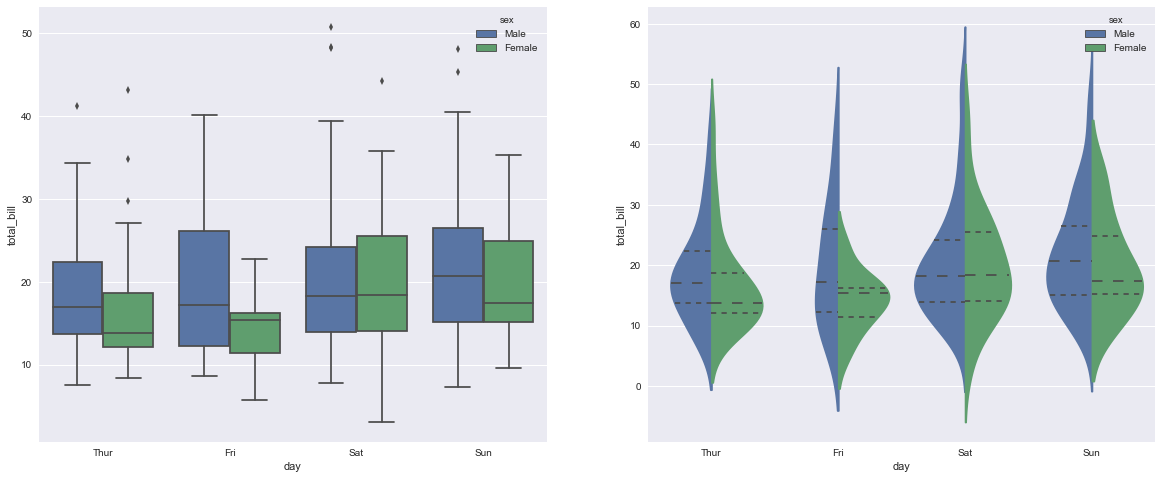

In [22]:
f, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, ax=axs[0]);
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="quart", ax=axs[1]);

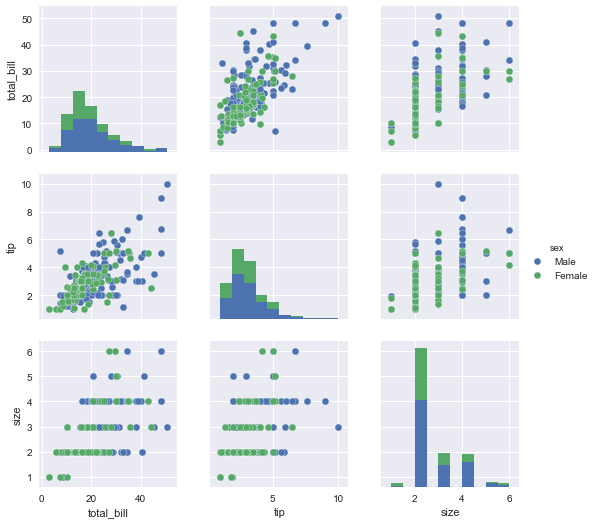

In [23]:
sns.pairplot(tips, hue='sex');

## Что еще?

### [Plotly](https://plot.ly/python/)

Особенности, которые выделяют Plotly:

* Наличие Dash - фреймворка для формирования сервиса с демострацией визуализации.
* Может анимировать графики.
* Поддерживает добавление интерактивных элементов управления: кнопок, слайдеров, полей ввода и других.
* Умеет строить такие fancy графики, которые мало где еще есть.


* Простые графики, однако, строятся достаточно громоздко, кмк.

### [Bokeh](https://bokeh.pydata.org/en/latest/)

Особенности, которые выделяют Bokeh:

* Может работать поверх WebGL, и без тормозов отрисовывать десятки тысяч точек.
* Полностью кастомизируется и отзывается на действия пользователя: можно писать callback'и на чистом JavaScript.

* Достаточно хорош в плане возможностей, интерфейсом похож на Seaborn. Так что годный выбор.

### [Google Facets](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)

Особенности, которые выделяют Facets:

* Работает прям в тетрадках, хотя и as-a-service-штука по сути.
* Куча всего может быть предварительно исследована в пару кликов мыши.

* Однако, начинает захлебываться, когда данных становится прям немало.